In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import plotly.express as px
import matplotlib.pyplot as plt
# import plotly.io as pio
# pio.renderers.default='notebook'

In [2]:
data_file_url = "https://github.com/sobiero/ads-data-files/blob/master/telco-customer-churn.csv?raw=true"

In [3]:
raw_df = pd.read_csv(data_file_url)

In [4]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
raw_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df = raw_df.copy()
df.drop(columns = ['customerID'], axis = 1, inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Churn by Gender

In [7]:
#len( df[ (df['gender'] == 'Female') & (df['Churn'] == 'Yes') ] )
#len( raw_df[ (df['gender'] == 'Male') & (df['Churn'] == 'Yes') ] )
churn_by_gender = df.groupby(['Churn']).gender.value_counts().reset_index(name='Counts')
churn_by_gender = churn_by_gender[churn_by_gender['Churn'] == 'Yes']
churn_by_gender

,Churn,gender,Counts
2,Yes,Female,939
3,Yes,Male,930


In [8]:
#Check percentage of Churning by Gender
df['gender'].value_counts(normalize=True) * 100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

Percentage of Churning for both Male and Female is almost half (50%) with male slighlty higher. Hence churning behavior appears not to be affected by gender. All genders can be equally targeted by advertisements 

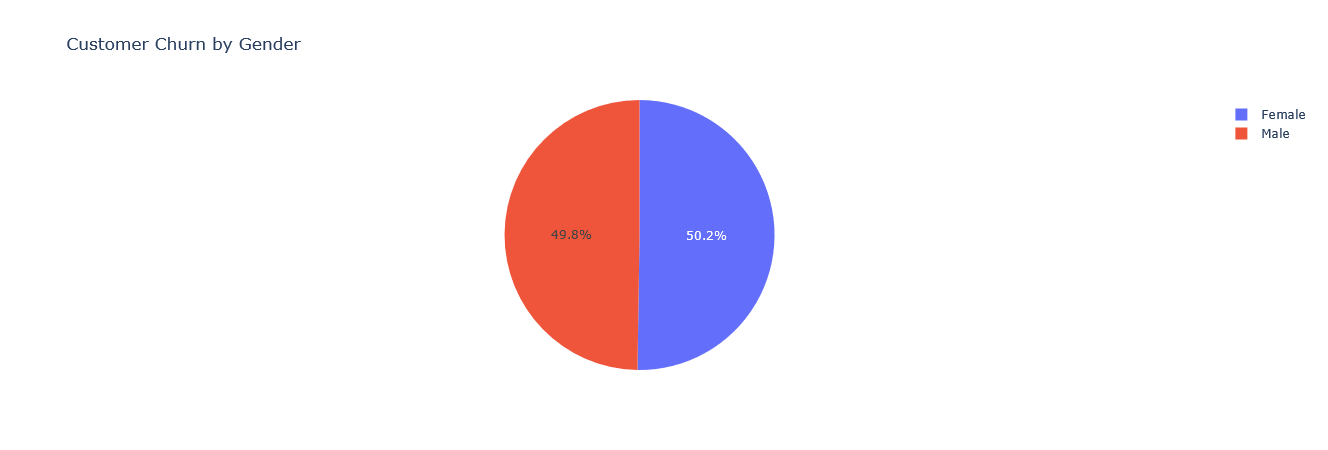

In [16]:
fig = px.pie(churn_by_gender, values = 'Counts', names = 'gender',
             title = 'Customer Churn by Gender')
fig.show()

#No Churn by Gender

In [10]:
no_churn_by_gender = df.groupby(['Churn']).gender.value_counts().reset_index(name='Counts')
no_churn_by_gender = no_churn_by_gender[no_churn_by_gender['Churn'] == 'No']
no_churn_by_gender

,Churn,gender,Counts
0,No,Male,2625
1,No,Female,2549


In [11]:
# Churn / No Churn by SeniorCitizen

In [12]:
churn_by_sc = df.groupby(['SeniorCitizen']).Churn.value_counts().reset_index(name='Counts')
#Percentage of those who churn, not churn
churn_by_sc['%'] = round(100 * churn_by_sc['Counts'] / churn_by_sc.groupby('SeniorCitizen')['Counts'].transform('sum'))
churn_by_sc

,SeniorCitizen,Churn,Counts,%
0,0,No,4508,76.0
1,0,Yes,1393,24.0
2,1,No,666,58.0
3,1,Yes,476,42.0


42% of senior citizens customers are more likely to churn as compared to non senior citizens (24%). Hence, the senior citizens may need more targeted advitisement to reduce churning. 

In [13]:
##Churn by contract type

In [30]:
churn_by_contract = df.groupby(['Contract']).Churn.value_counts().reset_index(name = 'Counts')
churn_by_contract['%'] = round(100 * churn_by_contract['Counts'] / churn_by_contract.groupby('Contract')['Counts'].transform('sum'))
churn_by_contract

,Contract,Churn,Counts,%
0,Month-to-month,No,2220,57.0
1,Month-to-month,Yes,1655,43.0
2,One year,No,1307,89.0
3,One year,Yes,166,11.0
4,Two year,No,1647,97.0
5,Two year,Yes,48,3.0


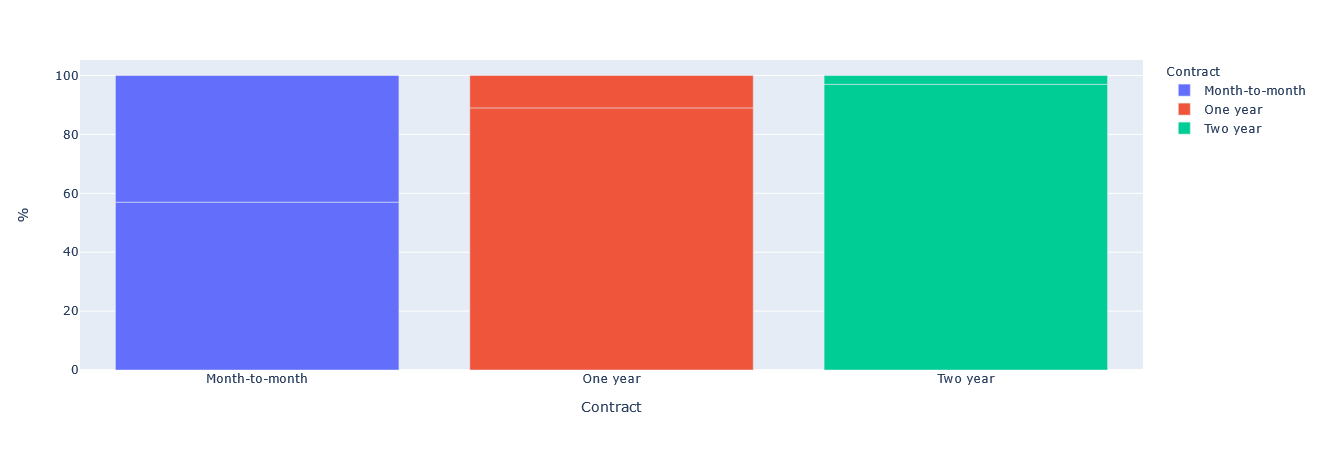

In [35]:
#churn_by_contract = px.data.medals_wide()
fig = px.bar(churn_by_contract, x='Contract', y='%', color="Contract")
#fig.update_layout(barmode='group')
fig.show();

- Customers with short term contracts, Month-to-month have the highest churn rate (43%) and vice versa.
- They may need to be targeted with specialized products or advetisements that would encourage them to take longer term contracts.  

In [43]:
#services contributing to churning
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [48]:
from sklearn.datasets import load_boston
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df
# df["MEDV"] = x.target
# X = df.drop("MEDV",1)   #Feature Matrix
# y = df["MEDV"]          #Target Variable
# df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


MonthlyCharges  Churn
InternetService Churn                       
DSL             No          118136.15   1962
                Yes          22529.20    459
Fiber optic     No          168984.35   1799
                Yes         114300.05   1297
No              No           29865.25   1413
                Yes           2301.60    113